In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('AdmissionPredict.csv').drop(columns='Serial No.').dropna()
df['Chance of Admit'].mask(df['Chance of Admit'] > 0.9, 1,inplace=True)
df['Chance of Admit'].mask(df['Chance of Admit'] <= 0.9, 0, inplace=True)
df['Chance of Admit'] = df['Chance of Admit'].astype(int)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4,4.5,4.5,9.65,1,1
4,314.0,103.0,2,2.0,3.0,8.21,0,0
5,330.0,115.0,5,4.5,3.0,9.34,1,0
7,308.0,101.0,2,3.0,4.0,7.90,0,0
8,302.0,102.0,1,2.0,1.5,8.00,0,0
...,...,...,...,...,...,...,...,...
394,329.0,111.0,4,4.5,4.0,9.23,1,0
395,324.0,110.0,3,3.5,3.5,9.04,1,0
397,330.0,116.0,4,5.0,4.5,9.45,1,1
398,312.0,103.0,3,3.5,4.0,8.78,0,0


In [2]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
X = df.iloc[:,0:7].values
Y = df.iloc[:,7].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [3]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
svc = SVC(C=1.0, random_state=1, kernel='linear')
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [5]:
y_predict = svc.predict(X_test_std)
metrics.accuracy_score(y_test, y_predict)

0.9696969696969697

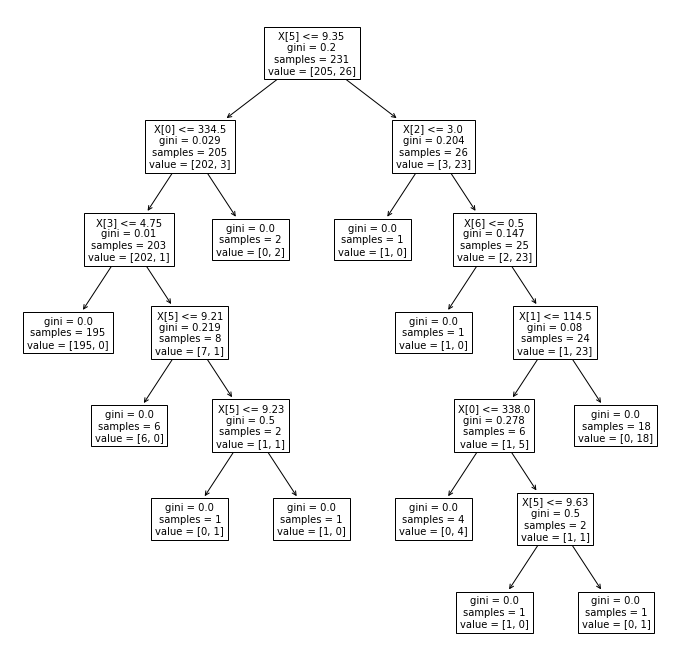

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, datasets
clf_tree = DecisionTreeClassifier(random_state=1)
clf_tree.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)